In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
LABELS = ["Normal","Fraud"]

In [67]:
dataset = pd.read_csv("creditcard.csv")

In [47]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [5]:
train_x, test_x = train_test_split(dataset, test_size=0.3, random_state=42)

train_x = train_x[train_x.Class == 0]       # where normal transactions
train_x = train_x.drop(['Class'], axis=1)   # drop the class column


test_y = test_x['Class'] # save the class column for the test set

test_x = test_x.drop(['Class'], axis=1)     # drop the class column

train_x = train_x.values                    # transform to ndarray
test_x = test_x.values                      # transform to ndarray
train_x

array([[-1.95225609e+00, -2.28956540e+00, -4.80259812e-01, ...,
         3.92241265e-01, -1.47756654e-01, -3.49231307e-01],
       [ 1.24006197e+00, -3.13716788e-01, -4.06434174e+00, ...,
        -2.90331333e-01,  1.10360002e-01,  4.42160499e+00],
       [ 5.19949707e-02, -1.80976314e+00, -5.67439077e-01, ...,
        -6.23851804e-02,  8.80786484e-02, -5.33729284e-02],
       ...,
       [-3.16265999e-01, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [-1.44938732e-01, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [-3.88157751e-01,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [6]:
nb_epoch = 50
batch_size = 64
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [63]:
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh")(input_layer)
# encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [65]:
history = autoencoder.fit(train_x, train_x,
                    epochs=10,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x,test_x)
                    ).history
history

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.2970 - loss: 0.8747 - val_accuracy: 0.4455 - val_loss: 0.7474
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4438 - loss: 0.7185 - val_accuracy: 0.4373 - val_loss: 0.7301
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4422 - loss: 0.7031 - val_accuracy: 0.4425 - val_loss: 0.7205
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4428 - loss: 0.6978 - val_accuracy: 0.4442 - val_loss: 0.7124
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4466 - loss: 0.7088 - val_accuracy: 0.4440 - val_loss: 0.7051
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4451 - loss: 0.6843 - val_accuracy: 0.4485 - val_loss: 0.7014
Epoch 7/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4438 - loss: 0.6712 - val_accuracy: 0.4391 - val_loss: 0.6935
Epoch 8/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4370 - loss: 0

{'accuracy': [0.3843815326690674,
  0.4422585964202881,
  0.44131892919540405,
  0.44516804814338684,
  0.44558006525039673,
  0.44576600193977356,
  0.4411732256412506,
  0.43915319442749023,
  0.43923863768577576,
  0.44219326972961426],
 'loss': [0.7940717935562134,
  0.7222627997398376,
  0.7093637585639954,
  0.701021134853363,
  0.6939471960067749,
  0.6870886087417603,
  0.6817463040351868,
  0.6724486947059631,
  0.6626099944114685,
  0.6559762358665466],
 'val_accuracy': [0.4454899728298187,
  0.4372739791870117,
  0.44245871901512146,
  0.444155752658844,
  0.4439801871776581,
  0.448521226644516,
  0.4391114413738251,
  0.43983709812164307,
  0.4435003399848938,
  0.441089391708374],
 'val_loss': [0.7473605275154114,
  0.7301141023635864,
  0.7204686403274536,
  0.7124098539352417,
  0.7051306962966919,
  0.7013967037200928,
  0.6934865117073059,
  0.6819567084312439,
  0.6742951273918152,
  0.6681655049324036]}

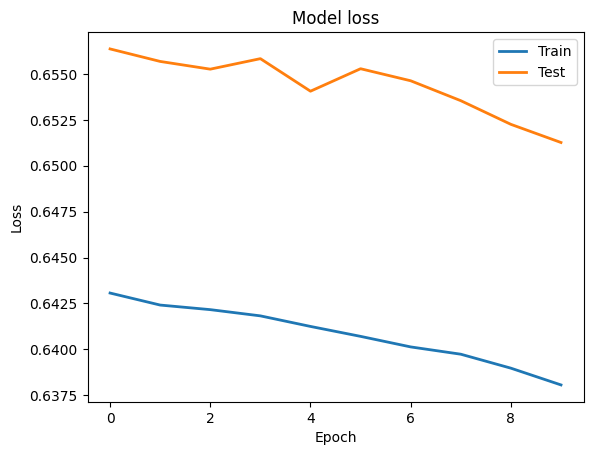

In [53]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [57]:
reconstructed_test_x = autoencoder.predict(test_x)


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 670us/step


array([[-1.        , -1.        ,  0.9942535 , ..., -0.0212146 ,
         0.00231945,  0.7851366 ],
       [-0.53310704,  0.6331813 , -1.        , ..., -0.04578634,
        -0.00535513,  0.40435454],
       [-0.5462466 ,  0.99706835, -1.        , ..., -0.03119745,
         0.01127874,  0.01413454],
       ...,
       [-0.8460982 ,  1.        , -0.95935017, ..., -0.05377043,
         0.01870395,  0.18457253],
       [ 0.99055195,  1.        ,  0.14942747, ..., -0.02162345,
         0.01703908, -0.24259979],
       [-0.95697963,  1.        , -0.03465778, ..., -0.02252109,
         0.01479433, -0.17666806]], dtype=float32)

In [70]:
from sklearn.metrics import mean_squared_error

# Calculate reconstruction error for each sample
reconstruction_errors = [mean_squared_error(test_x[i], reconstructed_test_x[i]) for i in range(len(test_x))]
reconstruction_errors

[73.36904775304818,
 0.5872727071409648,
 0.12188017515122758,
 0.1943330823893453,
 0.1583693106237473,
 0.8568469590027109,
 0.09868386882756443,
 0.3292514832703268,
 0.20488929803908756,
 1.799423874535006,
 0.17825135928170202,
 0.4759581220539095,
 0.16113260957369155,
 0.2584641264560073,
 0.5223419575871211,
 1.5162886854530762,
 0.7099826055306349,
 0.978133956425356,
 0.16927771040089948,
 0.8883686299643982,
 0.18192415459409814,
 0.21175319630281153,
 0.9496200572586438,
 0.5853932582940348,
 0.8052610360585337,
 0.39221571090865265,
 0.07343934818990663,
 0.5926824708019544,
 0.06271725423449172,
 1.0050950248068196,
 0.3295900717155093,
 1.5524592995204085,
 116.24677053879715,
 0.3394441260026729,
 0.13597008439648858,
 0.09686361979636135,
 0.1706851591826085,
 0.1644648715183502,
 0.12211230221867352,
 0.20403552724805568,
 0.141908691627663,
 1.856112953295244,
 0.3408061140354349,
 0.10365710449877821,
 2.6587476220707944,
 0.46174339124502173,
 0.15667359765149594,


In [42]:
threshold = 1.5

In [69]:
original_sample = test_x[1628]
reconstructed_sample = reconstructed_test_x[1628]
error = mean_squared_error(original_sample, reconstructed_sample)

# print("Original sample:", original_sample)
# print("Reconstructed sample:", reconstructed_sample)
# print("Reconstruction error:", error)
print("Predicted Label:", "Fraud" if error > threshold else "Normal")
print("Actual Label:", LABELS[test_y[random_index]])


Predicted Label: Normal
Actual Label: Normal
